In [2]:
import statistics
from PIL import ImageFont, ImageDraw, Image  
import numpy as np
import matplotlib.pyplot as plt
import cv2
import encryption

# Image Encryption and Decryption 🔐

## Image Encryption

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


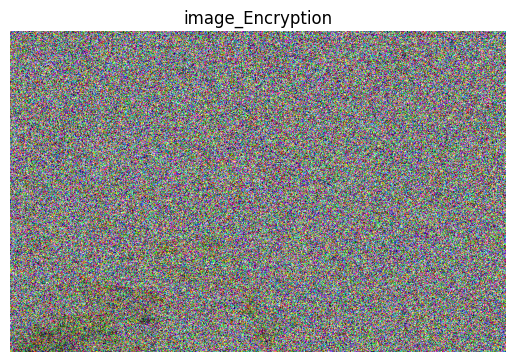

In [3]:
image = cv2.imread('input/creation-adam.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
key, image_encrypted = encryption.encrypting(image)

plt.imshow(image_encrypted)
plt.axis('off')
plt.title('image_Encryption')
plt.show()


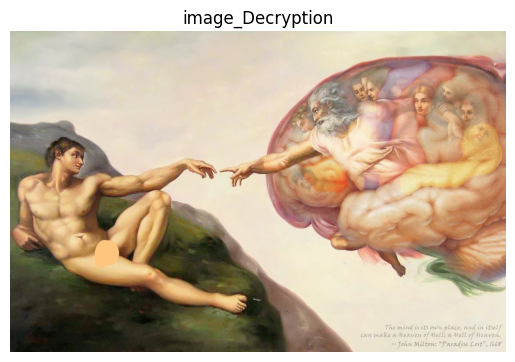

In [4]:
image_Decryption = encryption.decryption(image_encrypted, key)

plt.imshow(image_Decryption)
plt.axis('off')
plt.title('image_Decryption')
plt.show()

## PySide

In [11]:
import sys
import cv2
from PySide6.QtCore import *
from PySide6.QtWidgets import *
from PySide6.QtGui import *

image_py = cv2.resize(image, (image.shape[1]//4, image.shape[0]//4))
image_encrypted_py = cv2.resize(np.uint8(image_encrypted), (image.shape[1]//4, image.shape[0]//4))
image_Decryption_py = cv2.resize(np.uint8(image_Decryption), (image_Decryption.shape[1]//4, image_Decryption.shape[0]//4))

class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        layout = QGridLayout()

        self.my_lable = QLabel()
        self.my_lable.setText('Input image')
        layout.addWidget(self.my_lable,0,0)
        
        self.my_label = QLabel()
        layout.addWidget(self.my_label,1,0)
        image_qt = QImage(image_py, image_py.shape[1], image_py.shape[0], QImage.Format.Format_RGB888)
        image_qtixmap = QPixmap.fromImage(image_qt)
        self.my_label.setPixmap(image_qtixmap)

        self.my_lable = QLabel()
        self.my_lable.setText('Cipher image')
        layout.addWidget(self.my_lable,0,1)
        
        self.my_label = QLabel()
        layout.addWidget(self.my_label,1,1)
        image_qt = QImage(image_encrypted_py, image_encrypted_py.shape[1], image_encrypted_py.shape[0], QImage.Format.Format_RGB888)
        image_qtixmap = QPixmap.fromImage(image_qt)
        self.my_label.setPixmap(image_qtixmap)

        self.my_lable = QLabel()
        self.my_lable.setText('Dcripted image')
        layout.addWidget(self.my_lable,0,2)
        
        self.my_label = QLabel()
        layout.addWidget(self.my_label,1,2)
        image_qt = QImage(image_Decryption_py, image_encrypted_py.shape[1], image_encrypted_py.shape[0], QImage.Format.Format_RGB888)
        image_qtixmap = QPixmap.fromImage(image_qt)
        self.my_label.setPixmap(image_qtixmap)

        widget = QWidget()
        widget.setLayout(layout)
        self.setCentralWidget(widget)

if __name__ == '__main__':
    if not QApplication.instance():
        app = QApplication(sys.argv)
    else:
        app = QApplication.instance()        

    window = MyWindow()
    window.show()

    app.exec()